In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

# Collect Data

In [3]:
def collect (tickers, start_date, end_date):
    stock_data= yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    stock_data.dropna(inplace=True)
    return stock_data

def visualize_stock_prices(stock_data):
    stock_data.plot(figsize=(8, 4))
    plt.title("Stock Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend(labelspacing=0.8)
    plt.show()



In [4]:
stock_name = ['TSLA','TM','MBGYY','STLA','BMWYY','RACE','HMC']
market=["^GSPC"]
tickers=stock_name+market
start_date= datetime.now().replace(year=datetime.now().year-2, day=1)
end_date=datetime.now()
# convert date to string format
start_date = start_date.strftime("%Y-%m-%d")
end_date = end_date.strftime("%Y-%m-%d")

In [5]:
#collect the data
stock_data = collect(tickers, start_date, end_date)
stock_data= stock_data.rename(columns={"^GSPC":"GSPC"})
tickers=stock_data.columns
stock_data

[*********************100%%**********************]  8 of 8 completed


Ticker          BMWYY        HMC      MBGYY        RACE       STLA  \
Date                                                                 
2022-04-01  25.002251  27.915892  15.003477  218.036072  13.874145   
2022-04-04  25.062147  28.083584  15.063216  228.243561  13.874145   
2022-04-05  24.223604  27.047836  14.576756  222.671371  13.195288   
2022-04-06  23.735882  26.475710  14.448740  217.168198  12.677658   
2022-04-07  23.795778  25.637245  14.551152  218.351669  12.677658   
...               ...        ...        ...         ...        ...   
2024-04-03  40.410000  36.419998  19.990000  419.510010  27.049999   
2024-04-04  40.900002  36.200001  20.110001  414.029999  26.580000   
2024-04-05  40.700001  36.700001  20.170000  418.859985  26.639999   
2024-04-08  41.389999  37.009998  20.690001  423.549988  26.920000   
2024-04-09  41.369999  37.040001  20.639999  420.500000  27.250000   

Ticker              TM        TSLA         GSPC  
Date                                             
2022-04-01  180.369995  361.529999  4545.859863  
2022-04-04  182.580002  381.816681  4582.640137  
2022-04-05  177.660004  363.753326  4525.120117  
2022-04-06  176.520004  348.586670  4481.149902  
2022-04-07  174.490005  352.420013  4500.209961  
...                ...         ...          ...  
2024-04-03  241.779999  168.380005  5211.490234  
2024-04-04  239.160004  171.110001  5147.209961  
2024-04-05  240.740005  164.899994  5204.339844  
2024-04-08  244.210007  172.979996  5202.390137  
2024-04-09  246.929993  176.880005  5209.910156  

[507 rows x 8 columns]

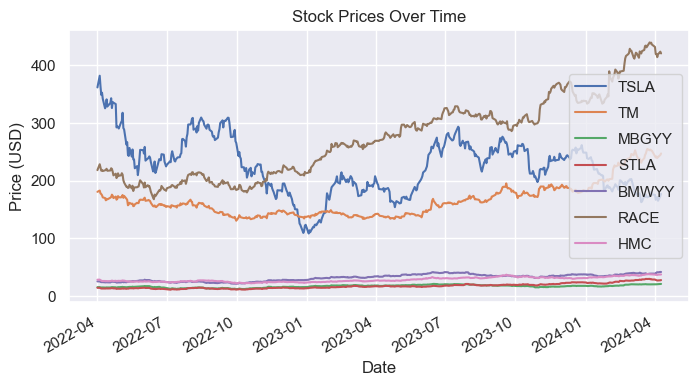

In [6]:
#visualize the data
visualize_stock_prices(stock_data[stock_name])

# Time Series Analysis

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [67]:
def visualize_stock_prices():
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
    fig.suptitle('Visualize Stock Prices')
    for i, ax in enumerate(axes.flatten()):
        stock = stock_data.columns[i]
        ax.plot(stock_data[stock], label=stock)
        ax.set_title(stock)
        ax.set_xlabel('Date')
        ax.set_ylabel('Adj Close Price')
        ax.legend()
        ax.grid(True)
        # ax.set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()
    
def check_stationarity():
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
    fig.suptitle('Check Stationarity')
    for i, ax in enumerate(axes.flatten()):
        stock = stock_data.columns[i]
        ax.plot(stock_data[stock].diff().dropna(), label=stock)
        ax.set_title(f"Differenced Time Series of {stock} Stock")
        ax.set_xlabel('Date')
        ax.set_ylabel("Price Difference (USD)")
        ax.legend()
        ax.grid(True)
        # ax.set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()

    
def plot_rolling_stats():
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
    fig.suptitle('Plot Rolling Statistics')
    for i, ax in enumerate(axes.flatten()):
        stock = stock_data.columns[i]
        roll_mean = stock_data[stock].rolling(window=30).mean()
        roll_std = stock_data[stock].rolling(window=30).std()
        ax.plot(stock_data[stock], label=f'{stock} Stock Price')
        ax.plot(roll_mean, label='Rolling Mean')
        ax.plot(roll_std, label='Rolling Std')
        
        ax.set_title(f"{stock} Stock Price with Rolling Mean and Standard Deviation")
        ax.set_xlabel('Date')
        ax.set_ylabel("Price (USD)")
        ax.legend()
        ax.grid(True)
        # ax.set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()
    

def decompose_seasonality():
    num_stocks = len(stock_data.columns)
    num_cols = 4
    num_rows = num_stocks
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 14)) #figsize=(16, 4*num_rows))
    for i, stock in enumerate(stock_data.columns):
        decomposition = seasonal_decompose(stock_data[stock], model='additive', period=12)  
        axes[i, 0].plot(decomposition.observed)
        axes[i, 0].set_title(f"Observed ({stock})")
        # axes[i, 0].set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)
        axes[i, 1].plot(decomposition.trend)
        axes[i, 1].set_title(f"Trend ({stock})")
        # axes[i, 1].set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)
        axes[i, 2].plot(decomposition.seasonal)
        axes[i, 2].set_title(f"Seasonal ({stock})")
        # axes[i, 2].set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)
        axes[i, 3].plot(decomposition.resid)
        axes[i, 3].set_title(f"Residual ({stock})")
        # axes[i, 3].set_xticklabels(stock_data.index.strftime('%Y-%m'), rotation=30)
    plt.tight_layout()
    plt.show()

    
def plot_autocorrelation():
    num_stocks = len(stock_data.columns)
    num_cols = 2
    num_rows = (num_stocks + 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 14))
    for i, stock in enumerate(stock_data.columns):
        row_index = i // num_cols
        col_index = i % num_cols
        plot_acf(stock_data[stock], lags=30, ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f"Autocorrelation Plot of {stock} Stock Price")
        axes[row_index, col_index].set_xlabel("Lag")
        axes[row_index, col_index].set_ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()

    
def plot_partial_autocorrelation():
    num_stocks = len(stock_data.columns)
    num_cols = 2
    num_rows = (num_stocks + 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 14))
    for i, stock in enumerate(stock_data.columns):
        row_index = i // num_cols
        col_index = i % num_cols
        plot_pacf(stock_data[stock], lags=30, ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f"Autocorrelation Plot of {stock} Stock Price")
        axes[row_index, col_index].set_xlabel("Lag")
        axes[row_index, col_index].set_ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()

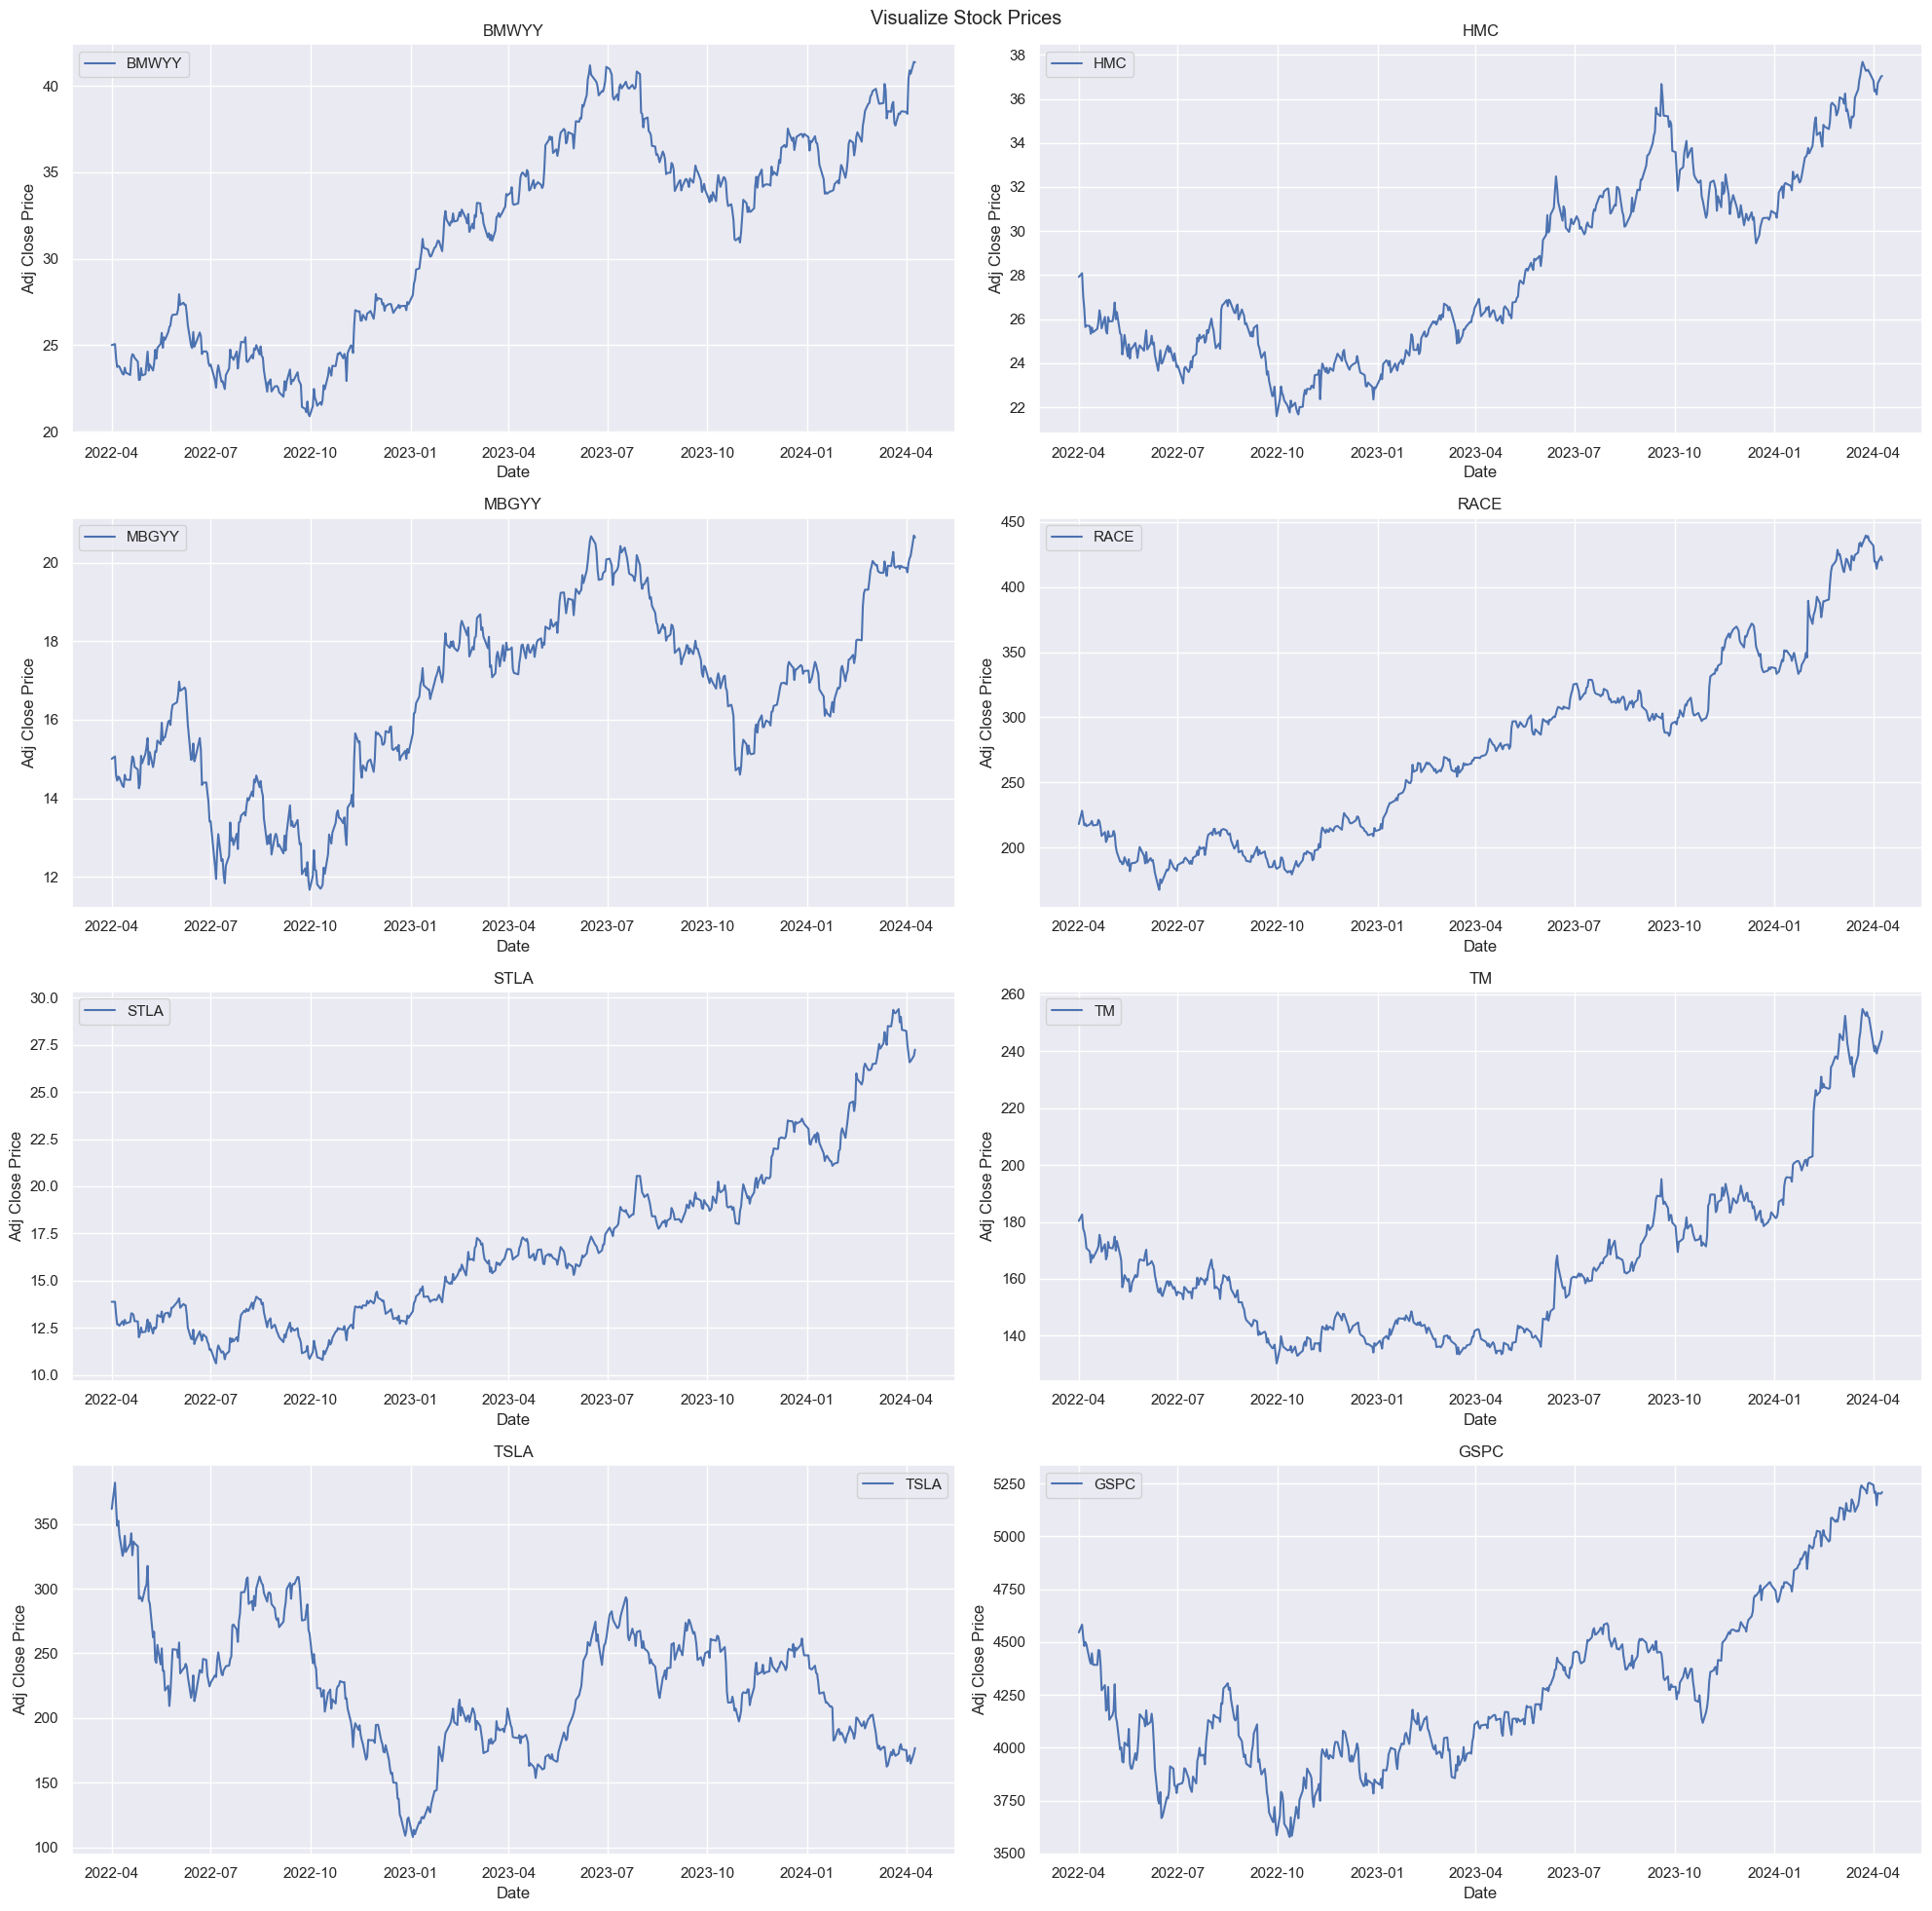

In [61]:
visualize_stock_prices() 

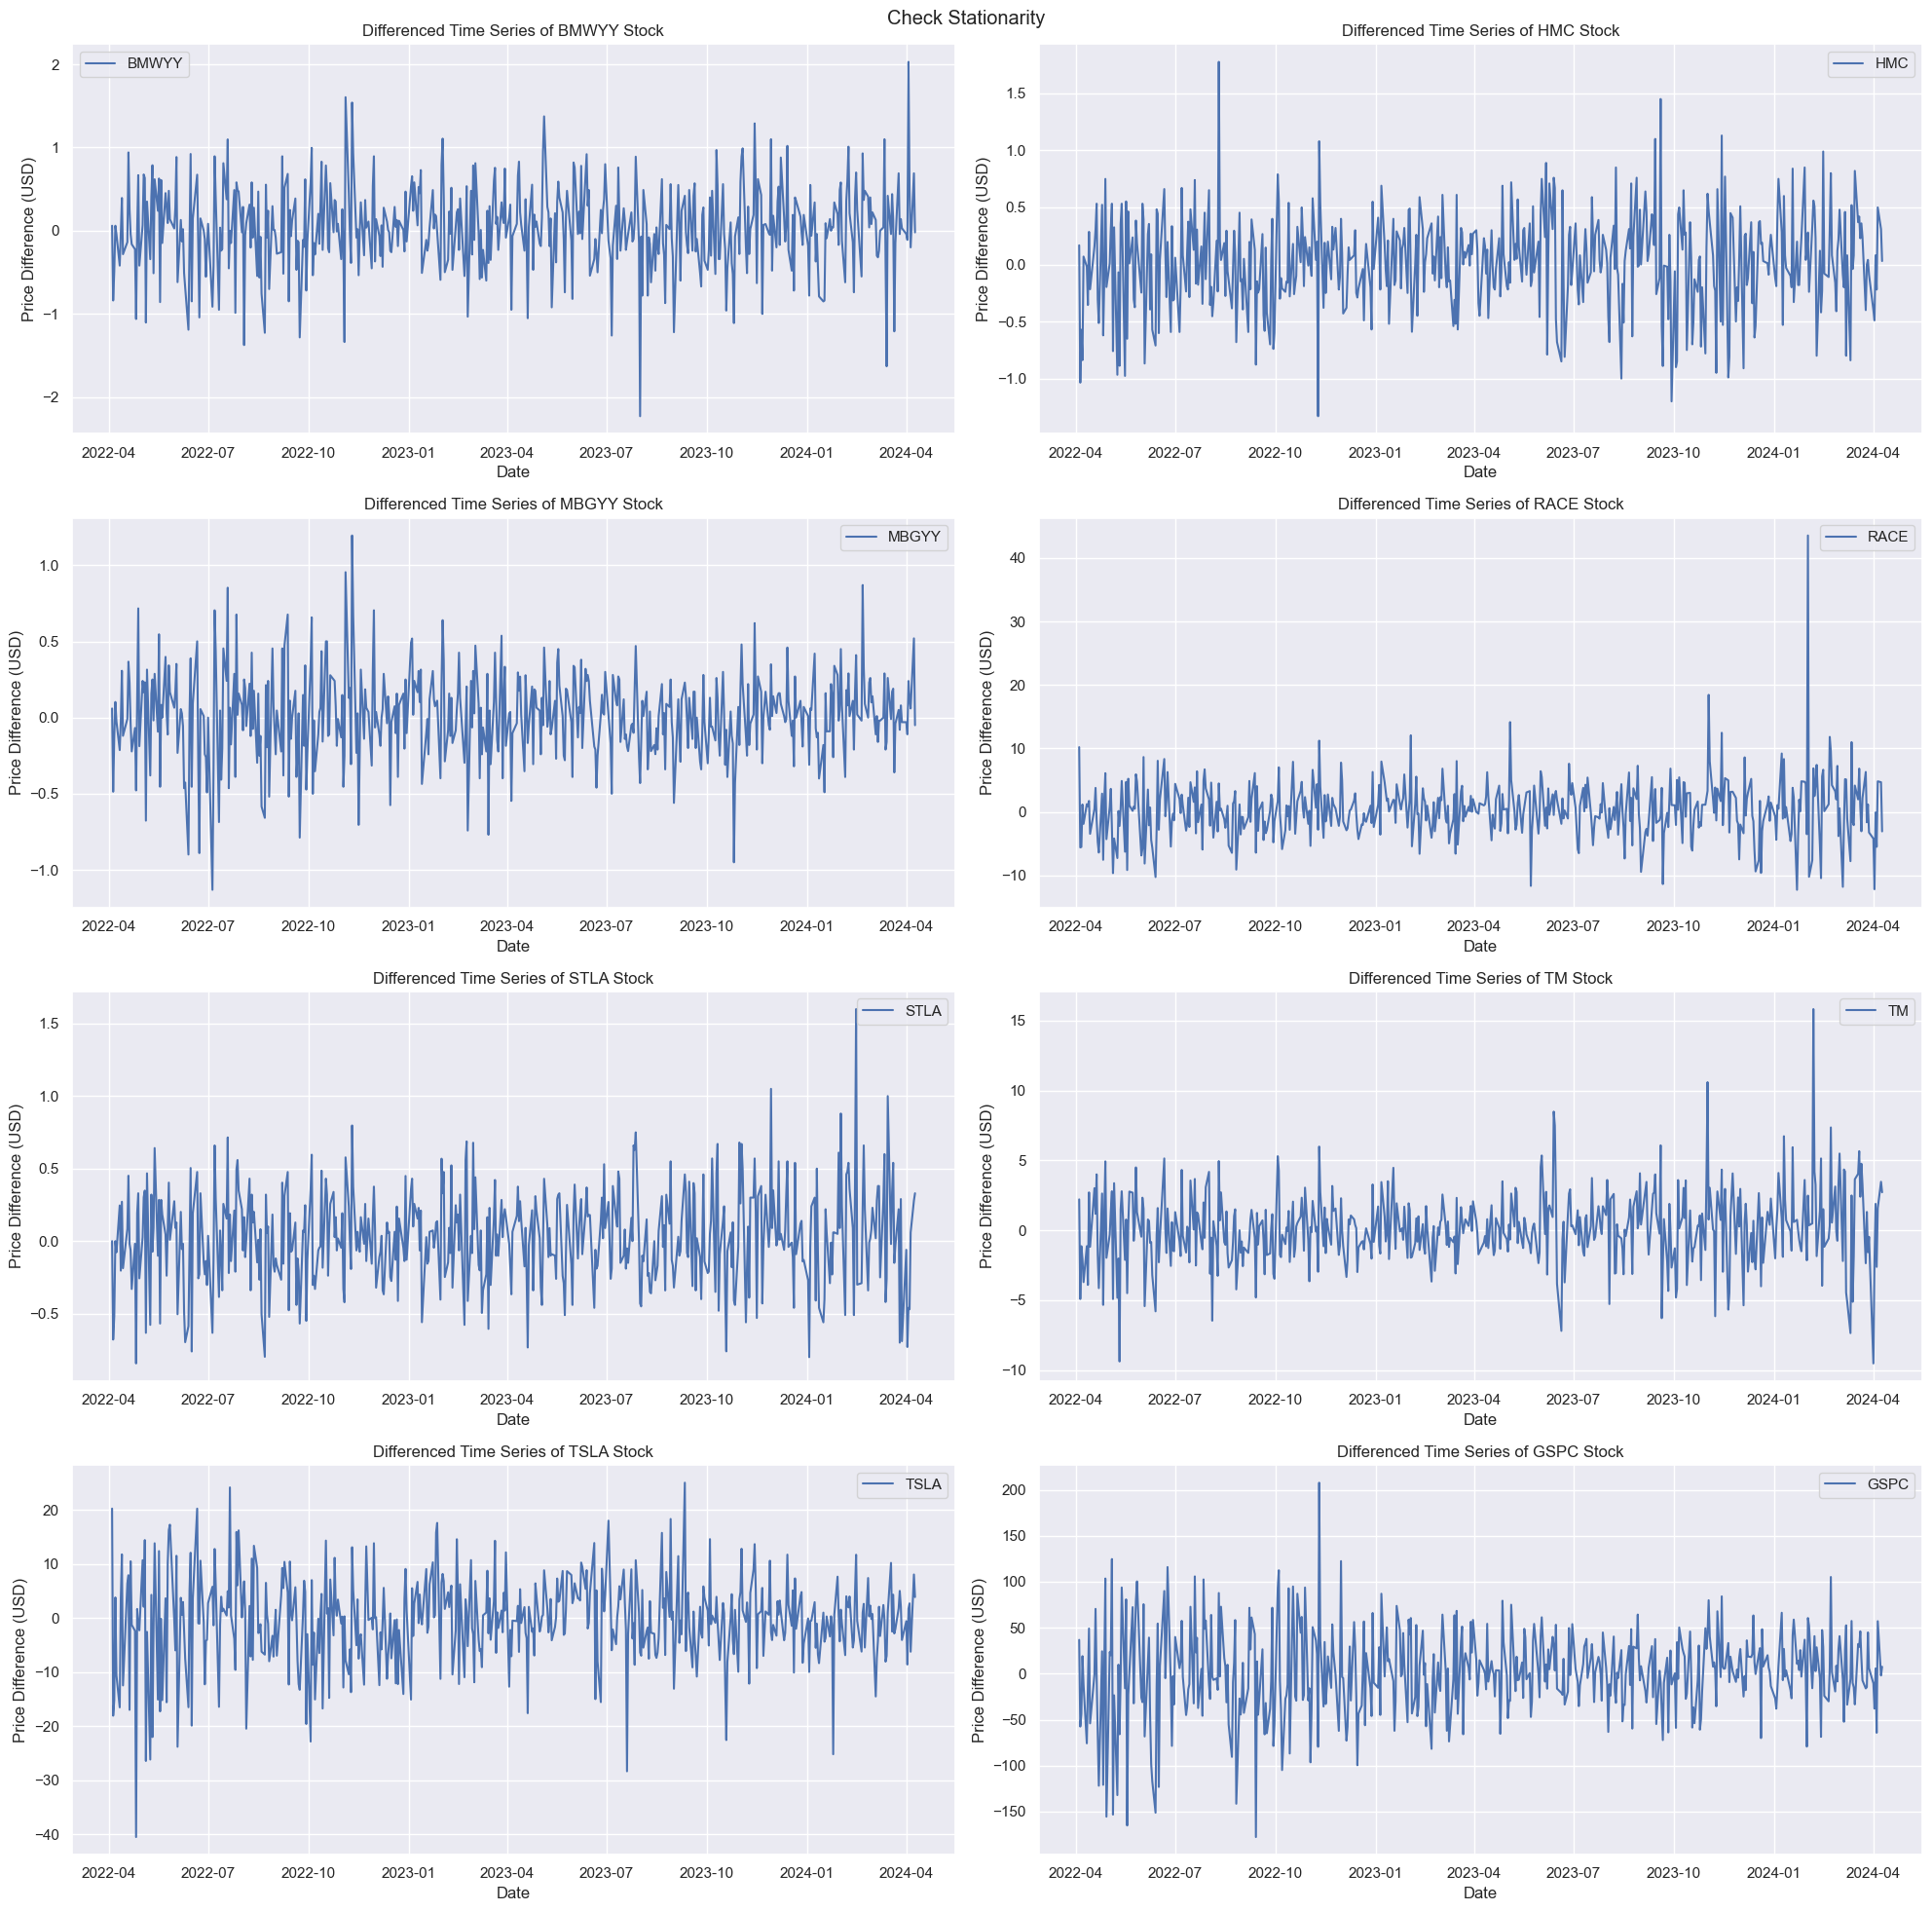

In [65]:
check_stationarity()

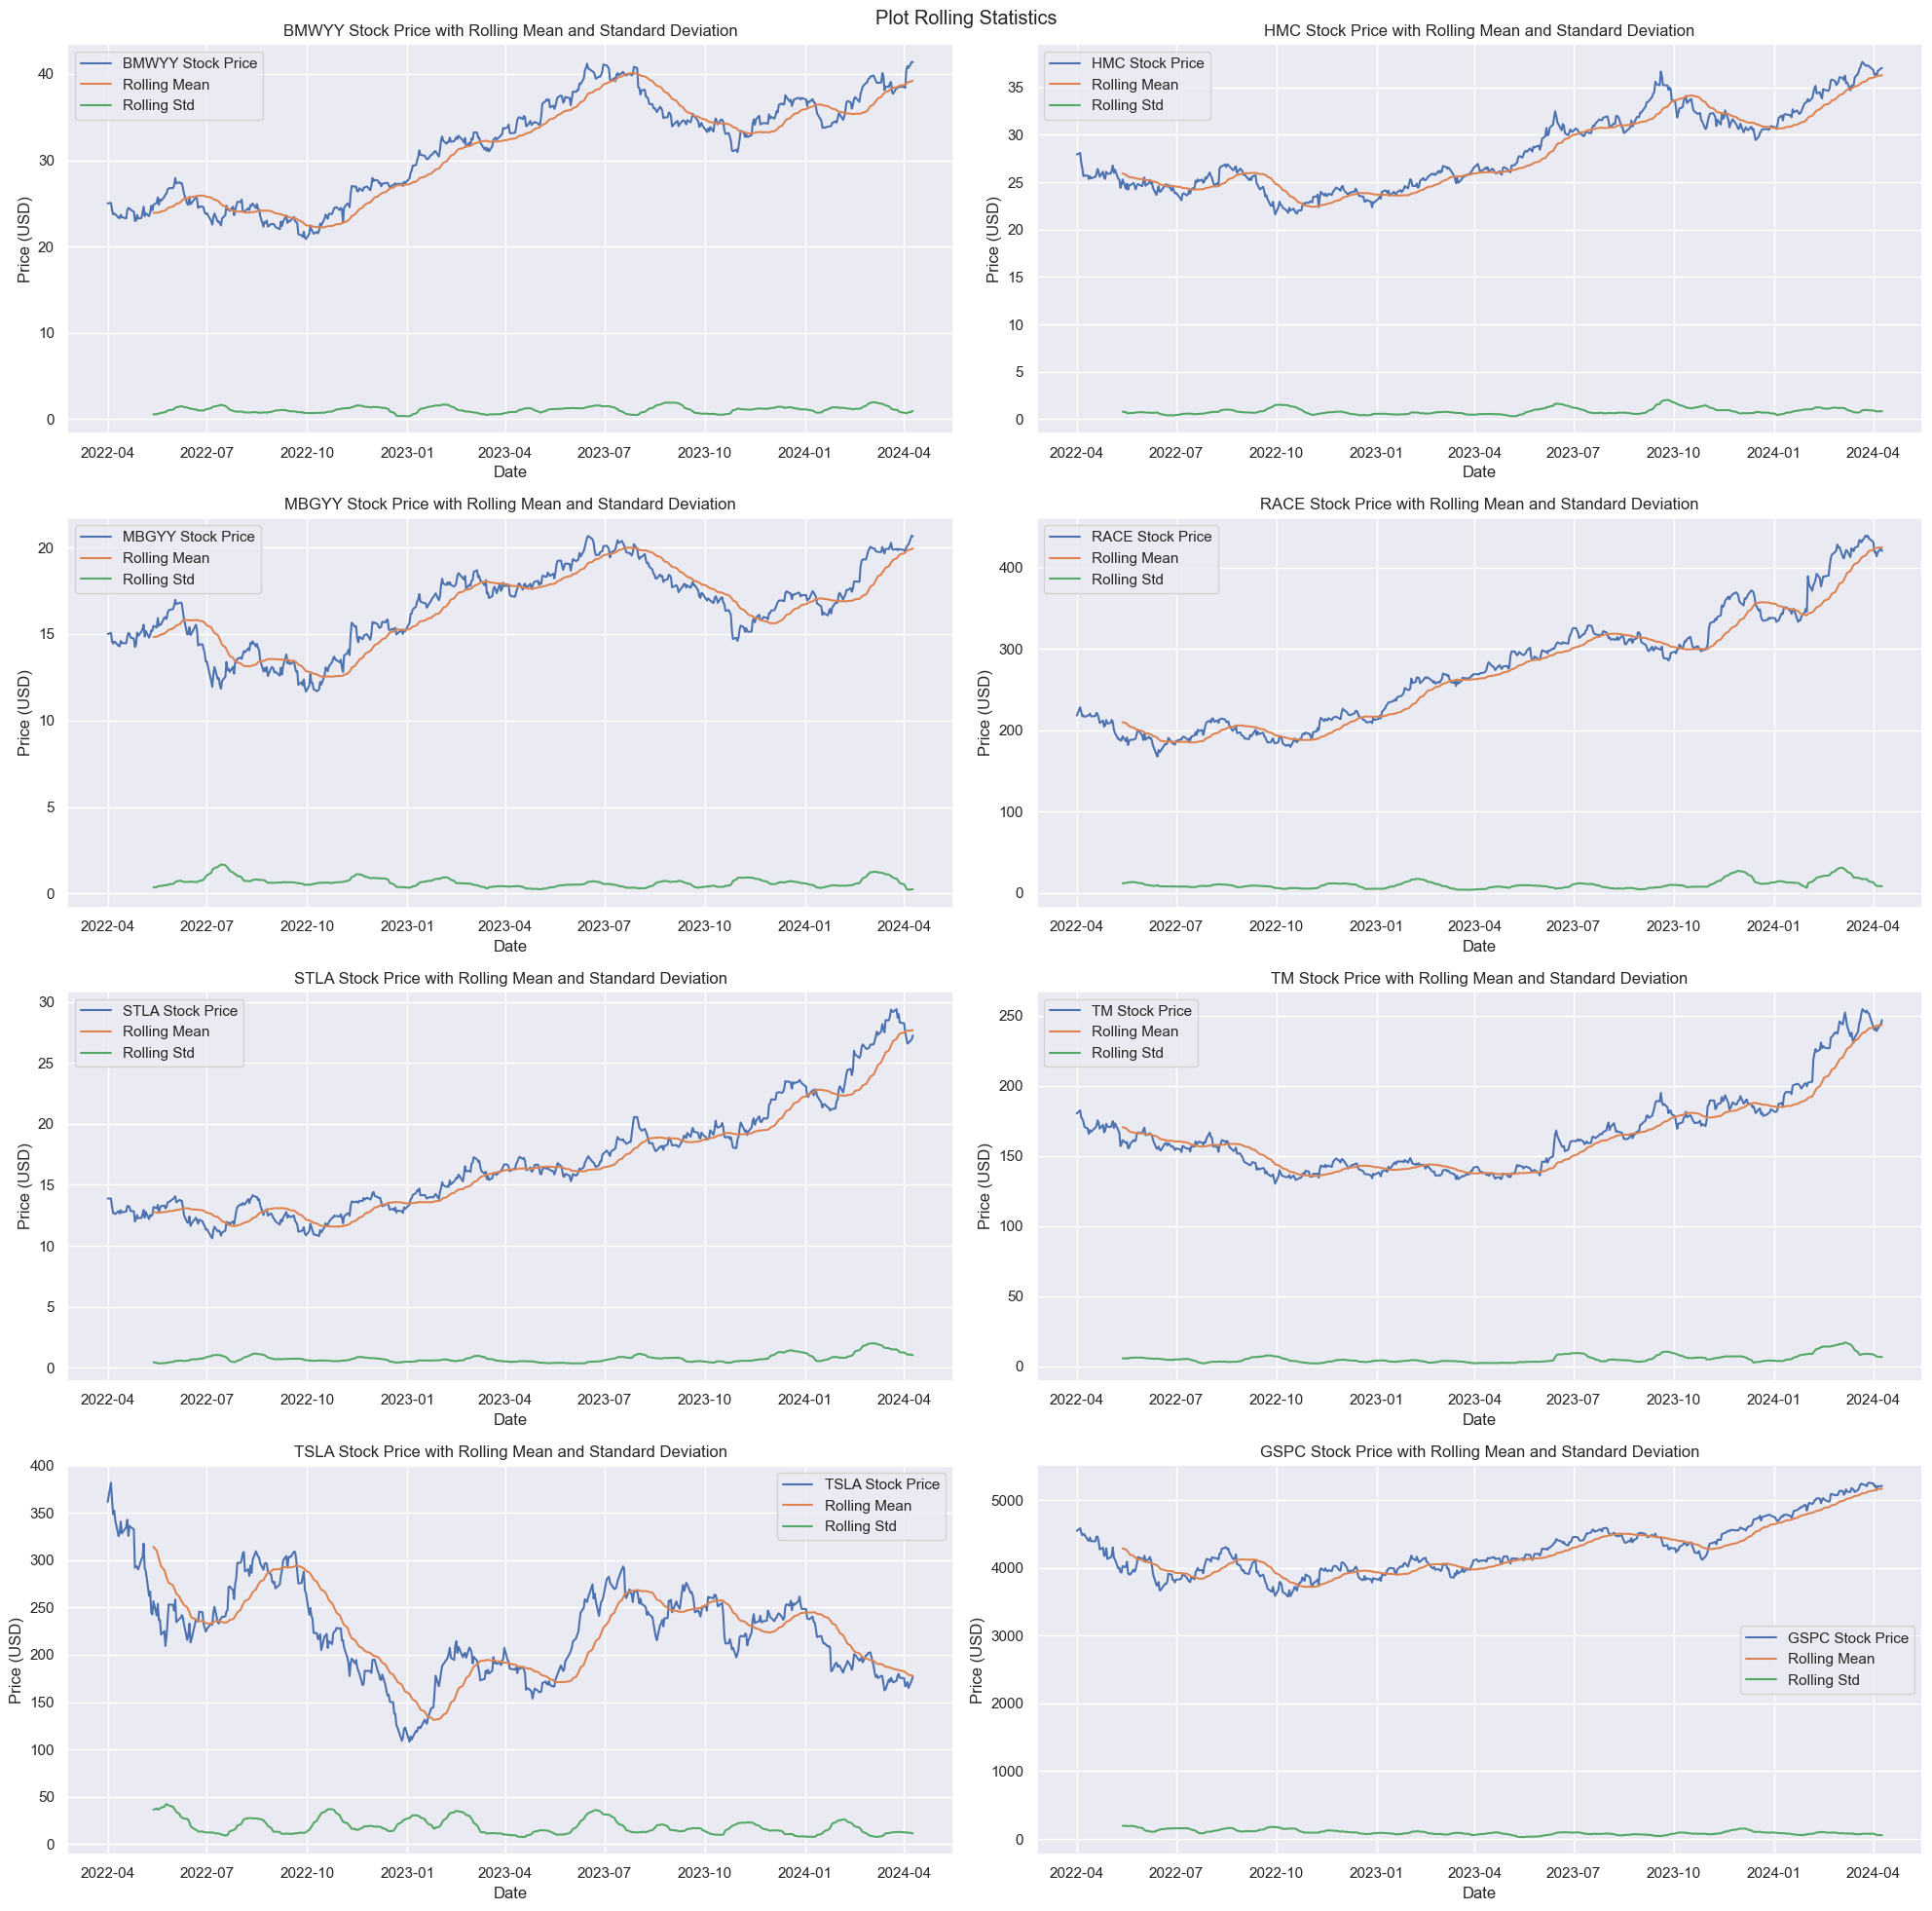

In [69]:
plot_rolling_stats()

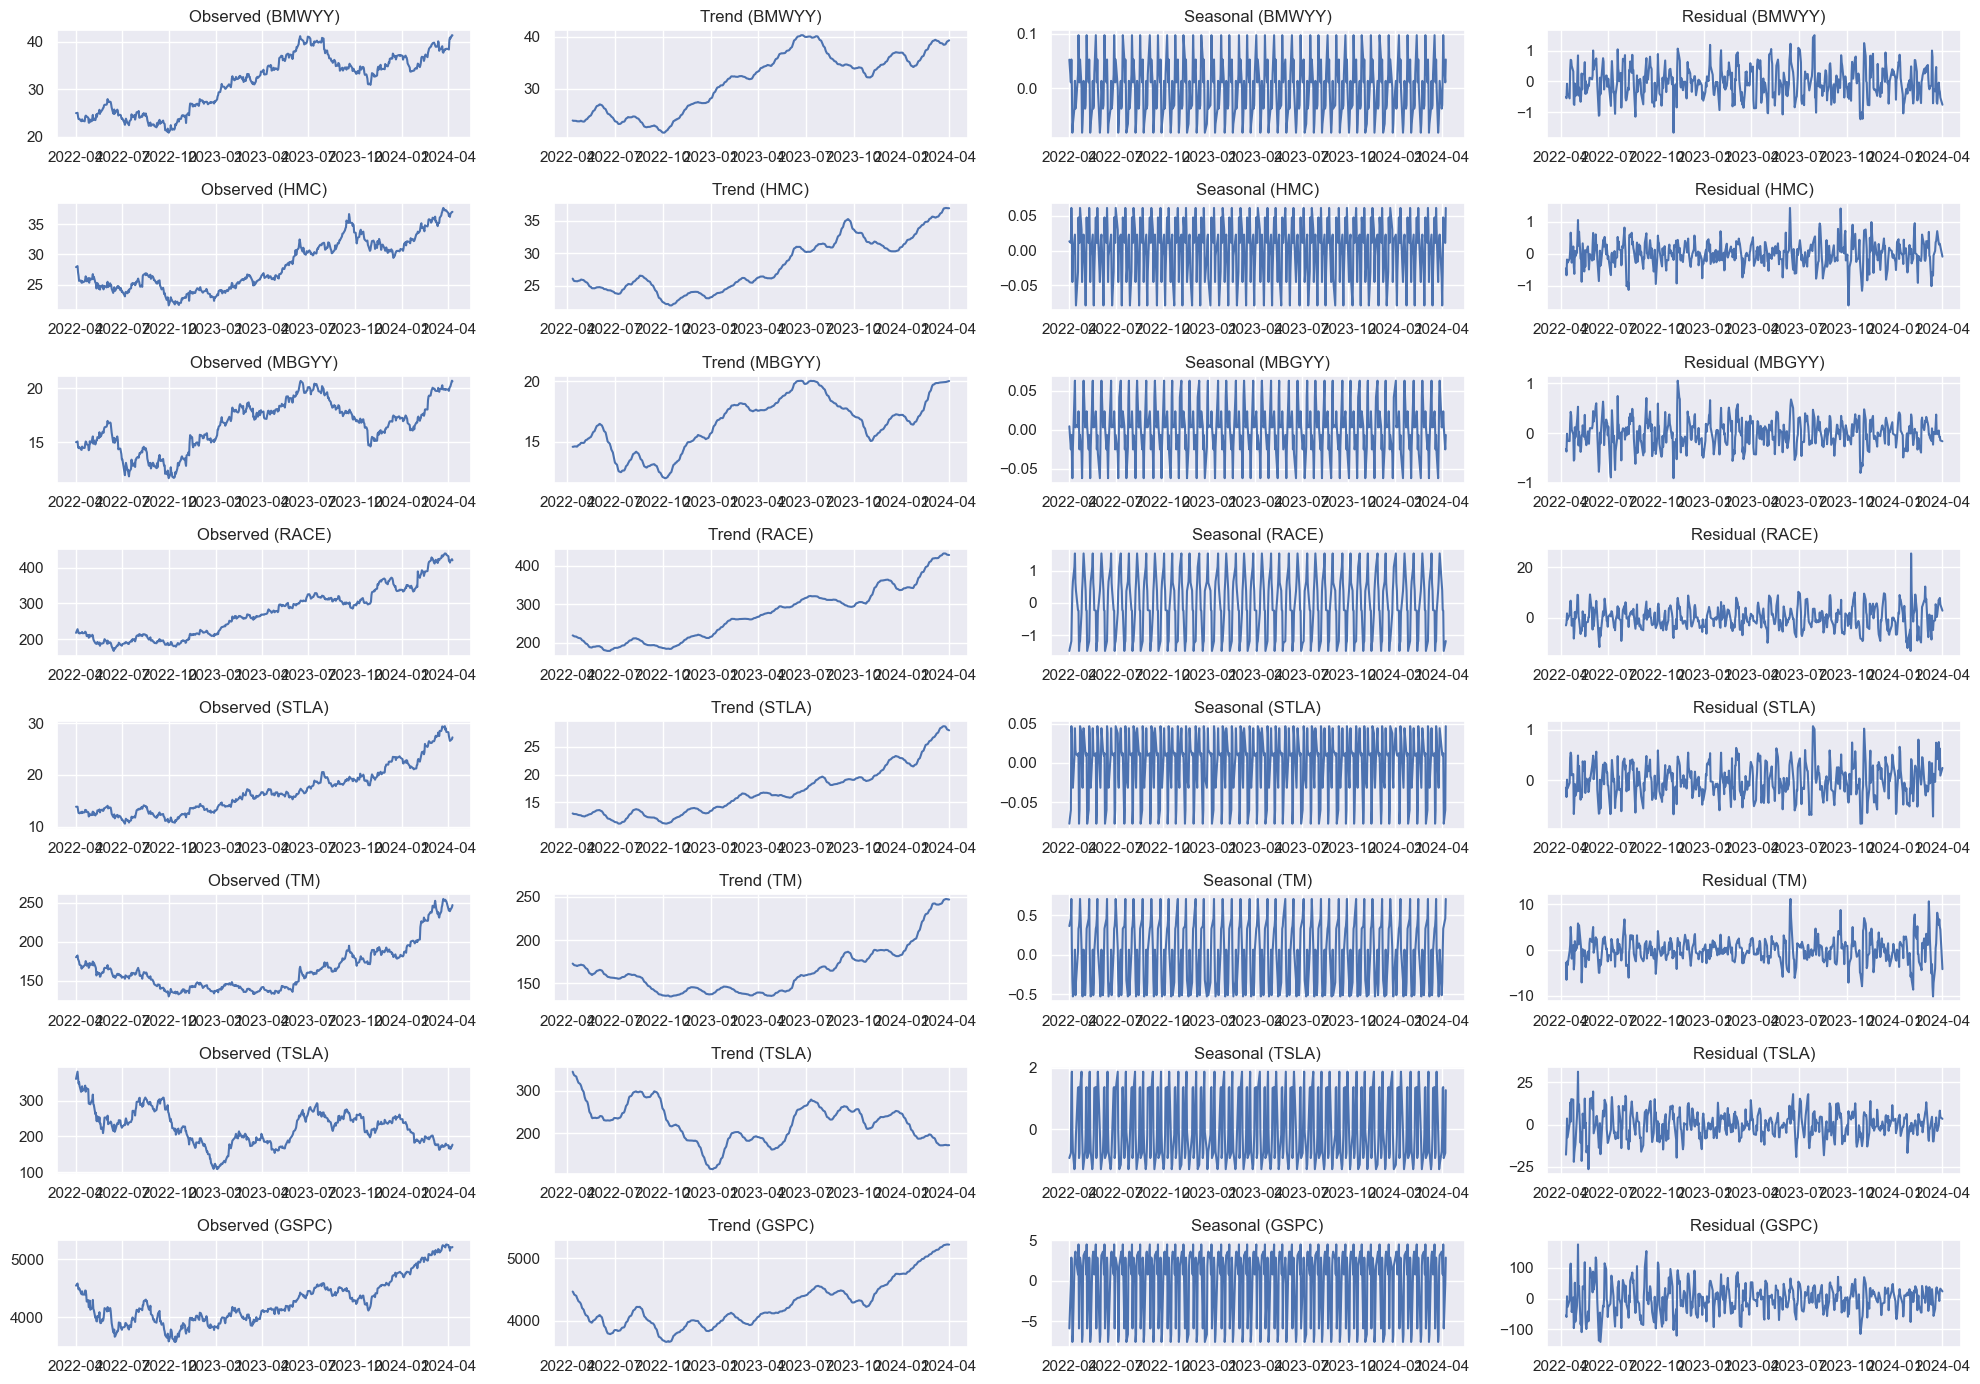

In [71]:
decompose_seasonality()

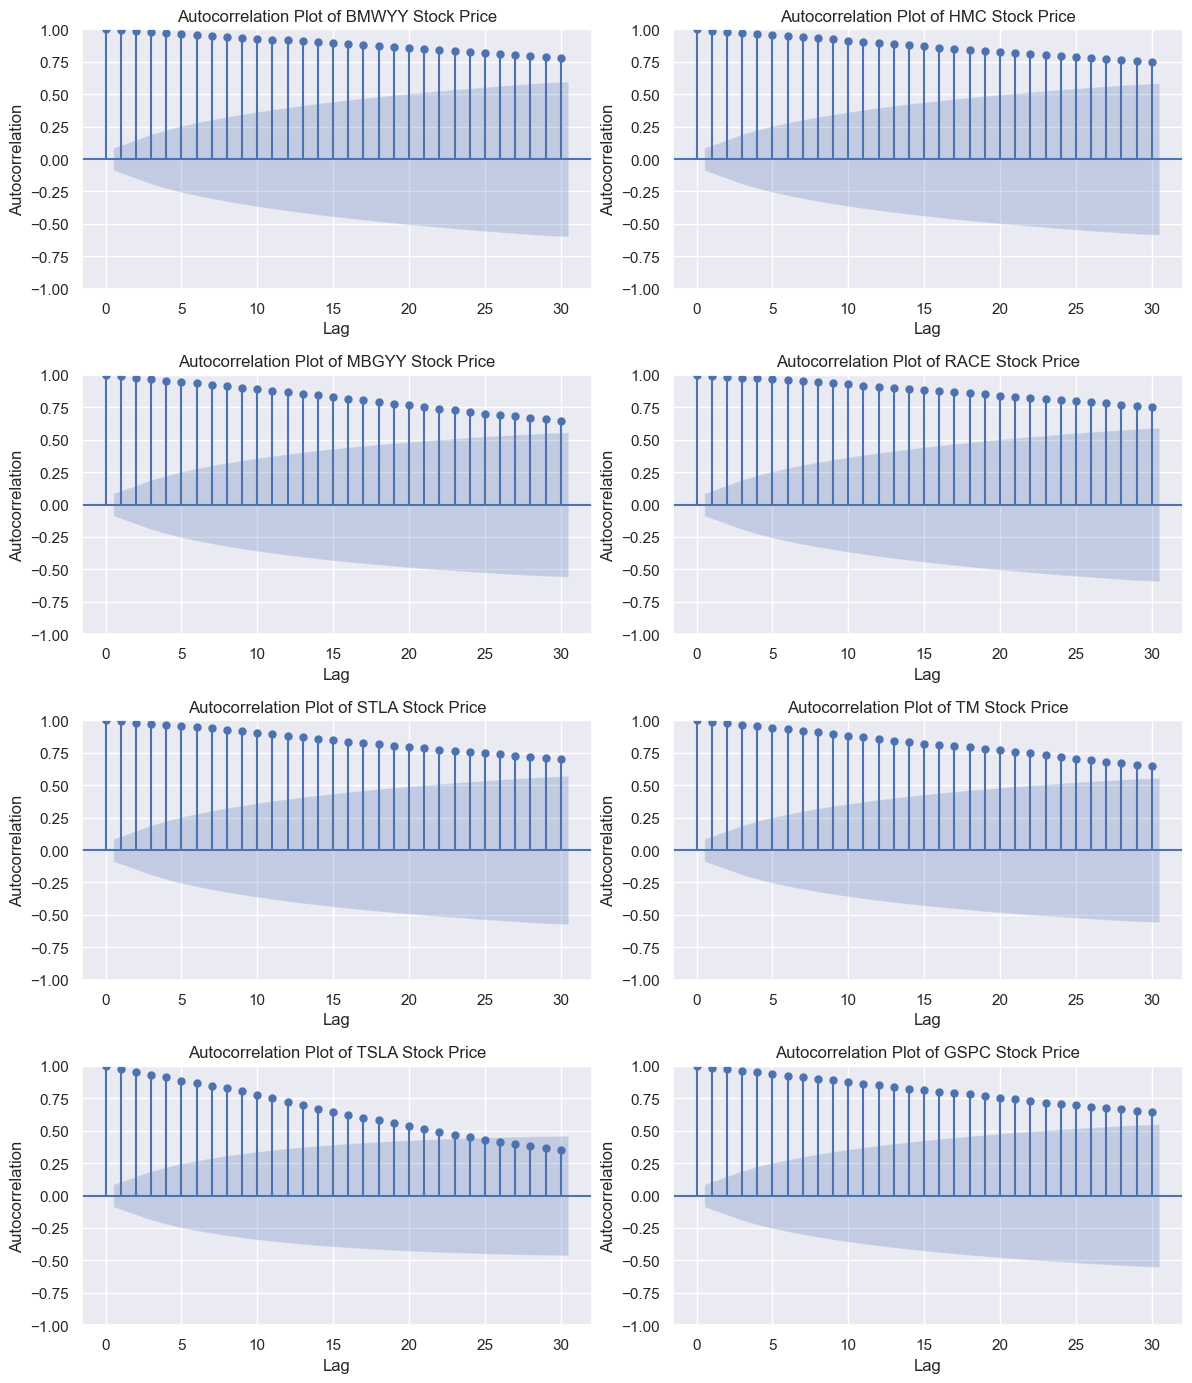

In [14]:
plot_autocorrelation()

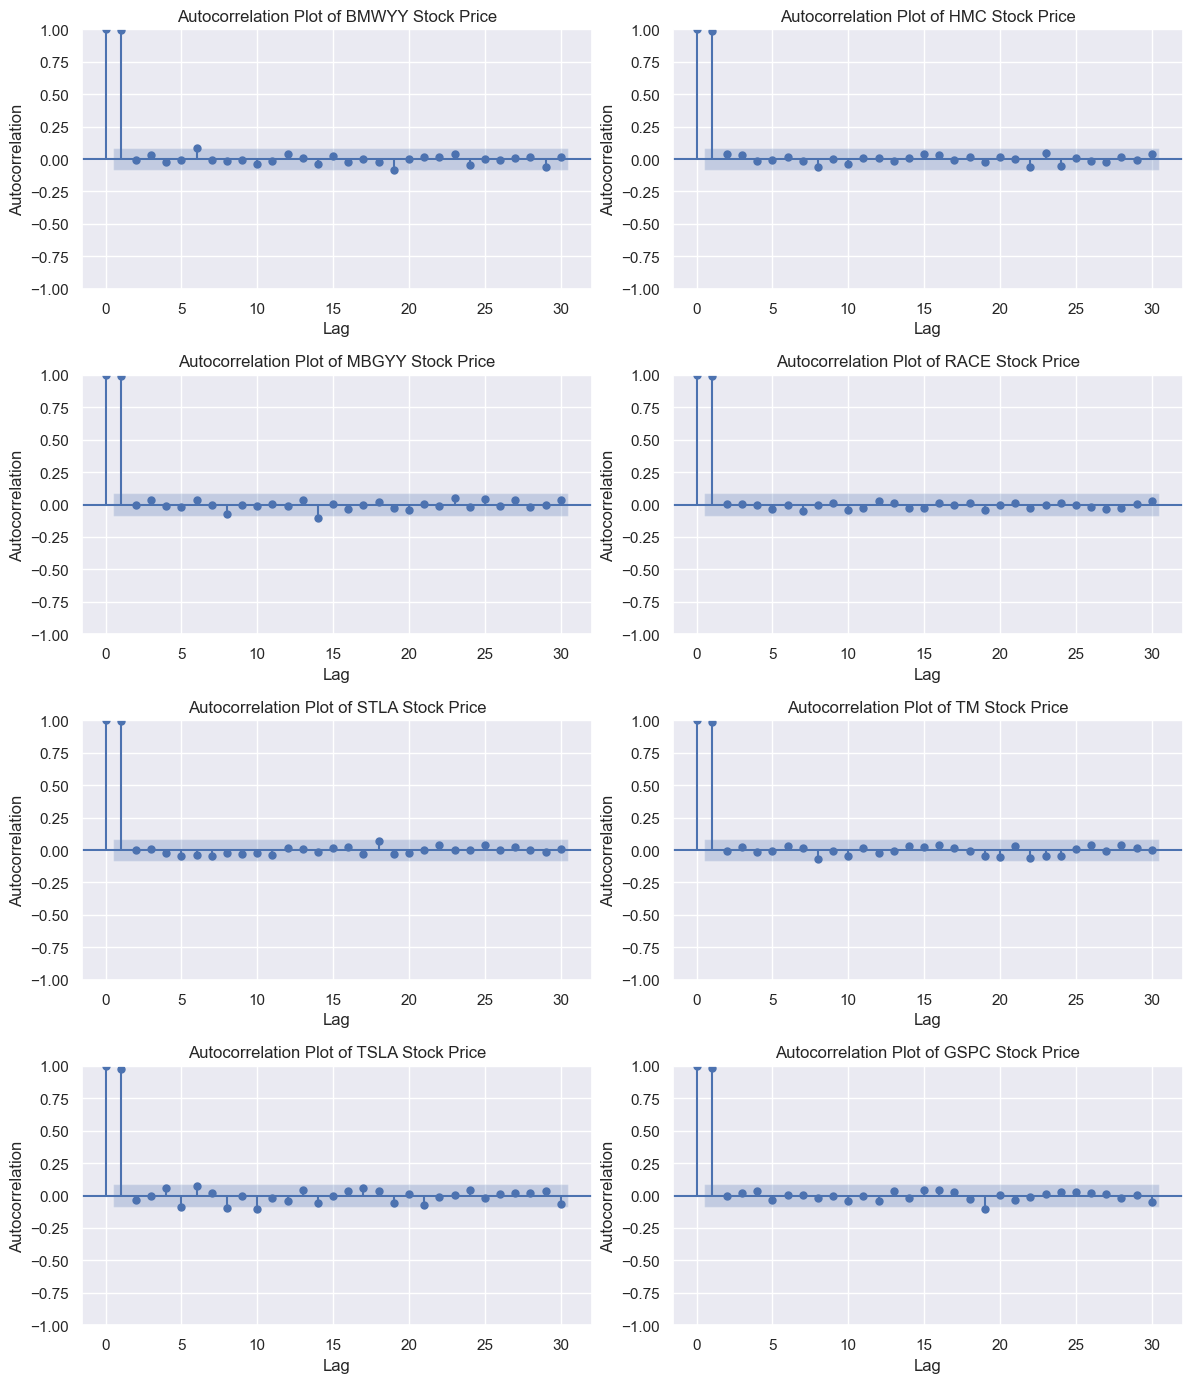

In [72]:
plot_partial_autocorrelation()

# Forecast Stock data for next 90 days

10:01:14 - cmdstanpy - INFO - Chain [1] start processing
10:01:14 - cmdstanpy - INFO - Chain [1] done processing
10:01:15 - cmdstanpy - INFO - Chain [1] start processing
10:01:15 - cmdstanpy - INFO - Chain [1] done processing
10:01:15 - cmdstanpy - INFO - Chain [1] start processing
10:01:15 - cmdstanpy - INFO - Chain [1] done processing
10:01:16 - cmdstanpy - INFO - Chain [1] start processing
10:01:16 - cmdstanpy - INFO - Chain [1] done processing
10:01:16 - cmdstanpy - INFO - Chain [1] start processing
10:01:16 - cmdstanpy - INFO - Chain [1] done processing
10:01:16 - cmdstanpy - INFO - Chain [1] start processing
10:01:17 - cmdstanpy - INFO - Chain [1] done processing
10:01:17 - cmdstanpy - INFO - Chain [1] start processing
10:01:17 - cmdstanpy - INFO - Chain [1] done processing
10:01:17 - cmdstanpy - INFO - Chain [1] start processing
10:01:18 - cmdstanpy - INFO - Chain [1] done processing


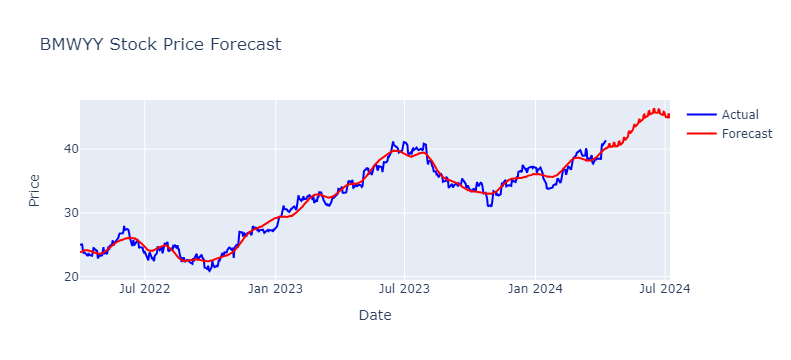

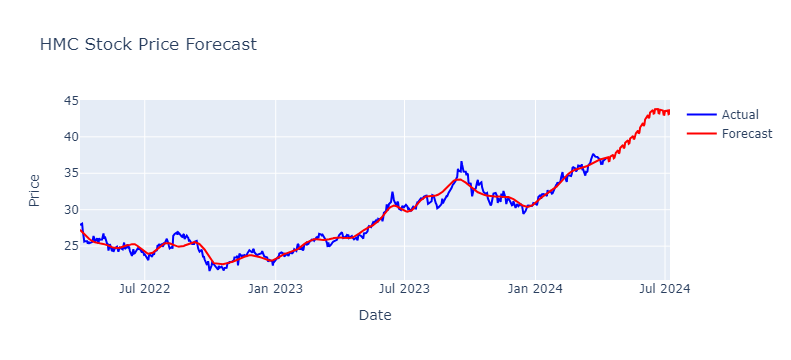

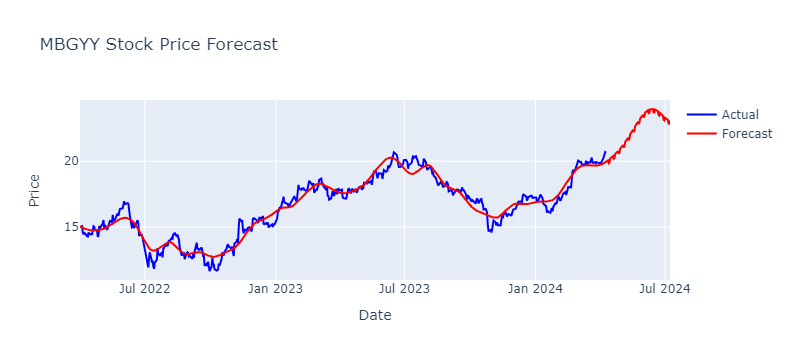

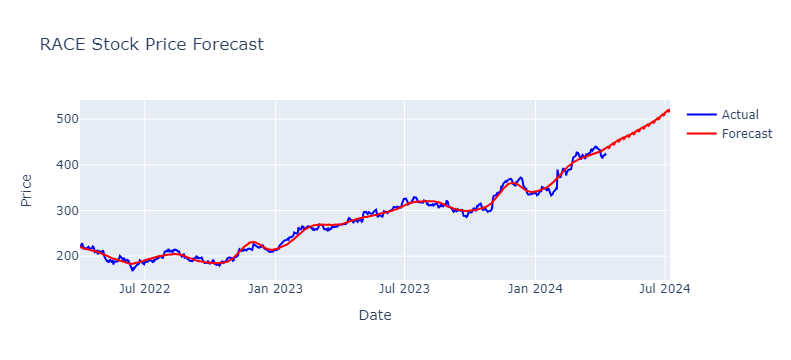

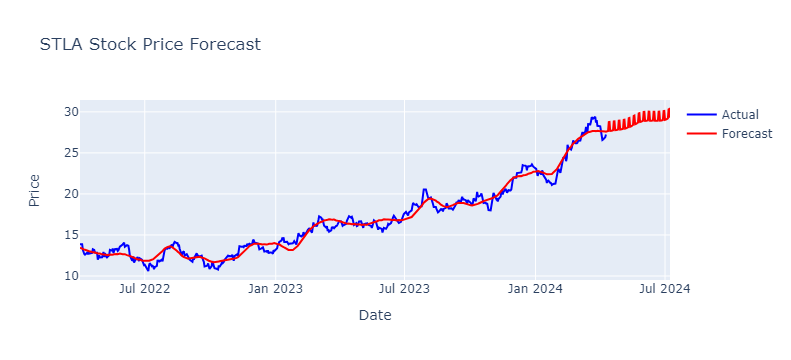

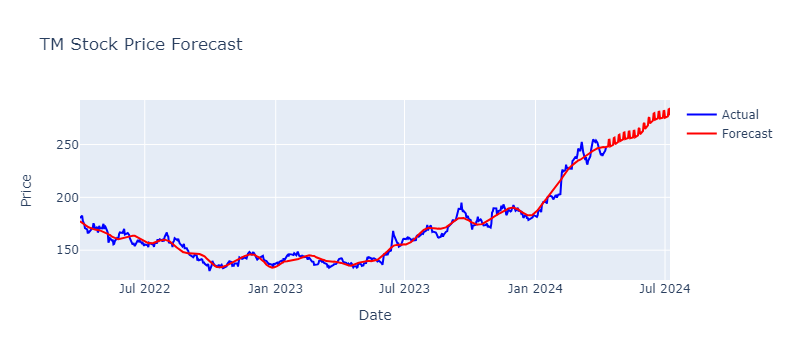

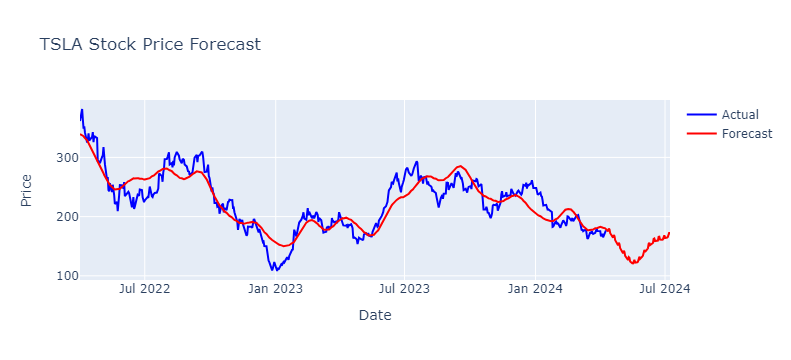

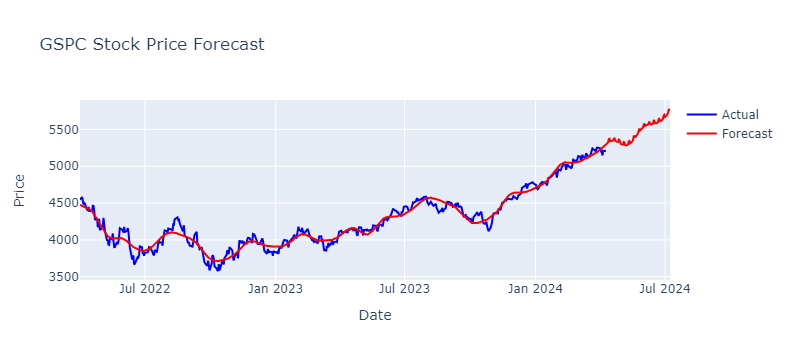

In [17]:
#!pip install prophet

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go

# Initialize an empty list to store plots
plots = []

df = pd.DataFrame(stock_data)
df = df.reset_index()
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Initialize future dataframe for next 90 days
future_dates = pd.date_range(start=df['Date'].max(), periods=90, freq='D')
forecast_dfs = pd.DataFrame({'ds': future_dates})
forecast_dfs = forecast_dfs.set_index('ds')

# Iterate through each column (except 'Date')
for column in df.columns[1:]:
    # Rename columns for Prophet model
    df_prophet = df[['Date', column]].rename(columns={'Date': 'ds', column: 'y'})
    # Initialize Prophet model
    model = Prophet()

    # Fit the model
    model.fit(df_prophet)

    # Make future dataframe for next 3 months
    future = model.make_future_dataframe(periods=90)
    
    # Predict on future dataframe
    forecast = model.predict(future)
    
    # Plot historical and forecasted data
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'], y=df[column], mode='lines', name='Actual', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='red')))
    fig.update_layout(title=f'{column} Stock Price Forecast', xaxis_title='Date', yaxis_title='Price')
    plots.append(fig)
    
    # Extract relevant columns from the forecast
    forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': column}).set_index('ds')

    # Concatenate the forecast dataframes along the 'ds' axis
    forecast_dfs = pd.merge(forecast_dfs,forecast, how='left', on = 'ds')

# Show all plots
for fig in plots:
    fig.show();

In [18]:
# Set 'ds' as new Date index
final_forecast = forecast_dfs.rename_axis('Date')
final_forecast

BMWYY        HMC      MBGYY        RACE       STLA  \
Date                                                                 
2024-04-09  40.070369  37.064693  19.930922  435.391451  27.591738   
2024-04-10  40.192960  37.090624  19.976190  436.736543  27.624475   
2024-04-11  40.207563  37.130005  20.014155  438.604514  27.654380   
2024-04-12  40.298960  37.182717  20.060643  439.683564  27.675717   
2024-04-13  40.893970  36.657149  19.849906  436.743493  28.755611   
...               ...        ...        ...         ...        ...   
2024-07-03  45.036766  43.535259  23.212940  516.458228  29.085983   
2024-07-04  44.949035  43.567010  23.174484  518.433444  29.141933   
2024-07-05  44.953743  43.620080  23.148085  519.567244  29.191923   
2024-07-06  45.478344  43.102726  22.868755  516.630818  30.303603   
2024-07-07  45.451524  43.158366  22.849044  517.683508  30.349562   

                    TM        TSLA         GSPC  
Date                                             
2024-04-09  247.576664  178.659602  5296.235143  
2024-04-10  247.632687  177.873785  5304.419386  
2024-04-11  247.952005  176.090194  5314.791750  
2024-04-12  248.137161  175.085805  5324.323112  
2024-04-13  254.373432  179.803891  5369.175373  
...                ...         ...          ...  
2024-07-03  275.856961  164.645658  5687.755612  
2024-07-04  276.356518  164.711118  5701.691142  
2024-07-05  276.747352  165.744019  5715.779223  
2024-07-06  283.213426  172.681270  5766.249763  
2024-07-07  283.623426  173.710429  5778.634456  

[90 rows x 8 columns]

In [19]:
final_forecast.shape

(90, 8)

# Run CAPM and plot SML

In [21]:
# Calculate stock return
stock_returns= final_forecast.pct_change()
stock_returns.dropna(axis=0,inplace=True)
# stock_returns.corr()

#assuming risk rate as 0.001
rf=0.0001
for i in stock_returns.columns:
    stock_returns[f'excess_return_{i}']= stock_returns[i]-rf    
stock_returns.head(5)

BMWYY       HMC     MBGYY      RACE      STLA        TM  \
Date                                                                     
2024-04-10  0.003059  0.000700  0.002271  0.003089  0.001186  0.000226   
2024-04-11  0.000363  0.001062  0.001901  0.004277  0.001083  0.001289   
2024-04-12  0.002273  0.001420  0.002323  0.002460  0.000772  0.000747   
2024-04-13  0.014765 -0.014135 -0.010505 -0.006687  0.039020  0.025132   
2024-04-14  0.000662  0.001087  0.002212  0.002514  0.000365  0.000620   

                TSLA      GSPC  excess_return_BMWYY  excess_return_HMC  \
Date                                                                     
2024-04-10 -0.004398  0.001545             0.002959           0.000600   
2024-04-11 -0.010027  0.001955             0.000263           0.000962   
2024-04-12 -0.005704  0.001793             0.002173           0.001320   
2024-04-13  0.026947  0.008424             0.014665          -0.014235   
2024-04-14 -0.007583  0.001051             0.000562           0.000987   

            excess_return_MBGYY  excess_return_RACE  excess_return_STLA  \
Date                                                                      
2024-04-10             0.002171            0.002989            0.001086   
2024-04-11             0.001801            0.004177            0.000983   
2024-04-12             0.002223            0.002360            0.000672   
2024-04-13            -0.010605           -0.006787            0.038920   
2024-04-14             0.002112            0.002414            0.000265   

            excess_return_TM  excess_return_TSLA  excess_return_GSPC  
Date                                                                  
2024-04-10          0.000126           -0.004498            0.001445  
2024-04-11          0.001189           -0.010127            0.001855  
2024-04-12          0.000647           -0.005804            0.001693  
2024-04-13          0.025032            0.026847            0.008324  
2024-04-14          0.000520           -0.007683            0.000951

In [22]:
# Calculate Beta

import statsmodels.api as sm

beta_results = {}
for stock_ticker in stock_name:
    y = stock_returns[f'excess_return_{stock_ticker}']
    X = stock_returns['excess_return_GSPC']
    X = sm.add_constant(X,prepend= False)  
    model = sm.OLS(y, X)
    results = model.fit()
    beta_results[stock_ticker] = results.params[0]  # Beta value

beta_df = pd.DataFrame.from_dict(beta_results, orient='index', columns=['beta'])
beta_df

#Calculate expected return
rm= stock_returns['GSPC'].mean()  #market expected return
beta_df['expected_return'] = (rf+ beta_df['beta']* (rm-rf)).round(5)
beta_df

beta  expected_return
TSLA   5.254642          0.00476
TM     3.080323          0.00283
MBGYY -1.503726         -0.00123
STLA   4.910665          0.00446
BMWYY  1.713246          0.00162
RACE  -1.019756         -0.00081
HMC   -1.786522         -0.00149

- TSLA has a beta of 6.764691, meaning it's highly volatile and tends to move more than 6 times the market.
- MBGYY has a negative beta of -3.071296, meaning it tends to move in the opposite direction of the market and is less volatile than the market.
- RACE has a negative beta of -0.798855, similar to MBGYY, indicating it also moves opposite to the market but less significantly.
- TM, STLA, BMWYY, and HMC have positive betas, indicating they're more volatile than the market but less volatile than TSLA.

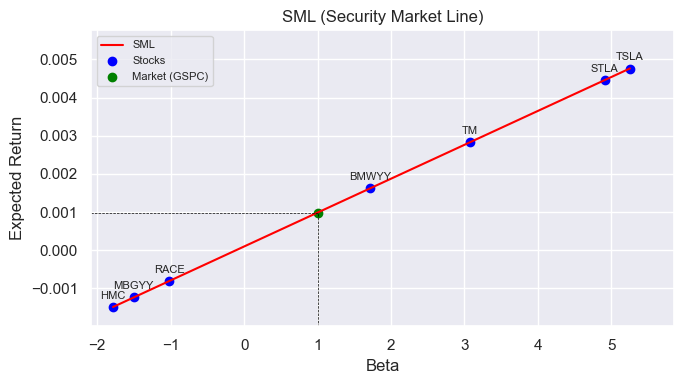

In [24]:
# PLot SML

plt.figure(figsize=(7,4))

# Plot SML slop
betas= np.linspace(min(beta_df["beta"]),max(beta_df["beta"]),100) #generate an array of x-values (betas) ranging from 0 to the maximum beta value
returns=rf + betas*(rm-rf)
plt.plot(betas, returns, color='red', label ='SML')

plt.scatter(beta_df["beta"], beta_df["expected_return"], color= 'blue', label = 'Stocks') # plot scatter for stocks
plt.scatter(1, rm, color= 'green', label='Market (GSPC)')  # plot scatter for market


#annotate
for index in beta_df.index:
    plt.annotate(index, (beta_df["beta"].loc[index], beta_df["expected_return"].loc[index]),textcoords="offset points", xytext=(0,6),ha='center', fontsize=8)

# Set axis limits
plt.xlim(min(beta_df["beta"])-0.3, max(beta_df["beta"]) + 0.6)
plt.ylim(min(beta_df["expected_return"])-0.0005, max(beta_df["expected_return"]) + 0.001)

# Plot dashed lines on x and y axes from the merket return
plt.plot([1, 1], [min(beta_df["expected_return"])-0.001, rm], color='black', linestyle='--', linewidth=0.5)
plt.plot([min(beta_df["beta"])-0.5, 1], [rm, rm], color='black', linestyle='--', linewidth=0.5)

#axis name and label name
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("SML (Security Market Line)")
plt.legend( fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Calculate Sharpe Ratio
sharpe_values = (stock_returns[stock_name].mean() - rf)/ np.std(stock_returns[stock_name])
sharpe_values

TSLA    -0.007708
TM       0.119415
MBGYY    0.224604
STLA     0.058694
BMWYY    0.187550
RACE     0.425031
HMC      0.220902
dtype: float64



The **Sharpe Ratio** is a measure used to evaluate the risk-adjusted return of an investment or a trading strategy. It helps investors understand whether the return of an investment is due to smart investment decisions or due to excessive risk
- TSLA has a negative Sharpe Ratio, indicating that its return is not sufficient to compensate for the risk taken.
- RACE has the highest Sharpe Ratio, suggesting that it has the best risk-adjusted return among the listed securities.
- MBGYY also has a relatively high Sharpe Ratio, indicating good risk-adjusted return.

# Calculate Optimized portfolio

In [28]:
# daily return of stocks
returns_df = stock_returns[stock_name]
cov_matrix=returns_df.cov()    #covariance matrix
annual_returns = returns_df.mean()*252   #annualized return
annual_std = returns_df.std()*np.sqrt(252)   #annualized std

In [29]:
# Optimize portfolio Parameters

from scipy.optimize import minimize

#Define the objective function 
def neg_sharpe(weights, annual_returns, cov_matrix, rf):
    portfolio_return=np.dot(weights, annual_returns)
    portfolio_volatility=np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - rf)/portfolio_volatility
    return -sharpe_ratio

# Define constraints (sum of weights equals 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Define bounds for weights (between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(returns_df.columns)))

# Initial guess (equally weighted)
init_guess = [1./len(returns_df.columns) for _ in range(len(returns_df.columns))]

# Optimize
opt_results = minimize(neg_sharpe, init_guess, args=(annual_returns, cov_matrix, rf), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights, return, and Sharpe ratio
optimal_weights = opt_results.x
optimal_return = np.dot(optimal_weights, annual_returns)
optimal_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
optimal_sharpe_ratio = -opt_results.fun

print("stock_name: ", stock_name)
# print("Optimal Weights:", ', '.join(map(str, optimal_weights)))
# print("Optimal Weights:", optimal_weights)
print("Optimal Weights:", [f'{weight:.6f}' for weight in optimal_weights])
print("Optimal Return:", optimal_return)
print("Optimal Volatility:", optimal_volatility)
print("Optimal Sharpe Ratio:", optimal_sharpe_ratio)


stock_name:  ['TSLA', 'TM', 'MBGYY', 'STLA', 'BMWYY', 'RACE', 'HMC']
Optimal Weights: ['0.000000', '0.227403', '0.005631', '0.000000', '0.073225', '0.569059', '0.124681']
Optimal Return: 0.45620652831532216
Optimal Volatility: 0.0006921073215210917
Optimal Sharpe Ratio: 659.0112748885615


# Plot Efficient Frontier

In [31]:
# Plot Efficient Frontier and Optimal Portfolio

# Portfolio Frontier
def portfolio_frontier(iterations, stock_name, rf):  
    portfolio_means= []
    portfolio_std= []
    all_weights=[]
    for i in range(iterations):
        weights= np.random.random(len(stock_name))
        weights/=np.sum(weights)
        all_weights.append(weights)
        portfolio_means.append(np.dot(weights, annual_returns) + (1 - np.sum(weights)) * rf) #calculate portfolio expected returns
        portfolio_std.append(np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))) #calculate portfolio expected std
    return np.array(portfolio_means), np.array(portfolio_std), np.array(all_weights)  # returns array of portfolio means, portfolio stds, weights
   
#Visualize 
def plot_efficient_frontier(portfolio_means, portfolio_std, optimal_return, optimal_volatility, rf):
    plt.figure(figsize=(14,7))
    plt.scatter(portfolio_std, portfolio_means, c=(portfolio_means-rf)/portfolio_std, marker='o', cmap='viridis', s=50, label='Random Portfolios')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(optimal_volatility, optimal_return, c='red',marker='*', s=100, edgecolors='black', label='Maximum Sharpe Ratio')
 
    plt.xlabel('Annualized Volatility (Standard Deviation)')
    plt.ylabel('Annualized Expected Return')
    plt.title('Efficient Frontier')
    plt.legend(labelspacing=0.8)
    plt.show()

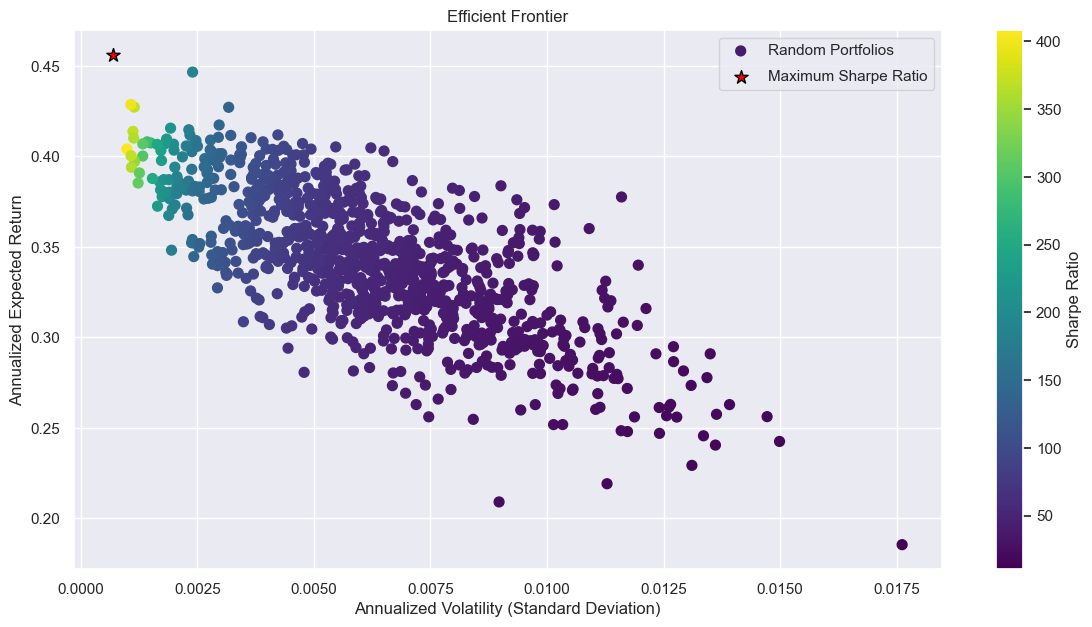

In [32]:
iterations= 1000
portfolio_means, portfolio_std, all_weights = portfolio_frontier(iterations, stock_name, rf)
plot_efficient_frontier(portfolio_means, portfolio_std, optimal_return, optimal_volatility, rf)